In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from matplotlib import colormaps
import cv2
import os

%config InlineBackend.figure_format='svg'
%matplotlib inline
plt.style.use('ggplot')

cmap = colormaps["gray"]
width = 28

In [4]:
x, y = fetch_openml("mnist_784", return_X_y=True, as_frame=False)
x = x / 255

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(list(map(len, [x_train, x_test, y_train, y_test])))

K = 3

knc = KNeighborsClassifier(n_neighbors=K)
knc = knc.fit(x_train, y_train)

y_predicted = knc.predict(x_test)
score = accuracy_score(y_test, y_predicted)

print(f"{K = }")
print(f"{score = }")

[52500, 17500, 52500, 17500]
K = 3
score = 0.9709142857142857


[ 4607  5006 17282 14008 10407  3962 13585  7747 12759]


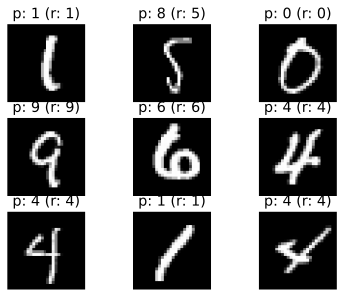

In [34]:
cmap = colormaps["gray"]

inds = np.random.randint(len(y_test), size=9)
print(inds)
fig, axs = plt.subplots(3, 3)
for i in range(9):
    ii = inds[i]
    pic = np.resize(x_test[ii], (width, width))
    this_axs = axs[i // 3, i % 3]
    this_axs.imshow(pic, cmap=cmap)
    this_axs.set_title(f"p: {y_predicted[ii]} (r: {y_test[ii]})")
    this_axs.axis('off')

plt.show()

1751
0.9605939463163906
[ 273 1388  989 1518 1690 1127 1450   55 1409]


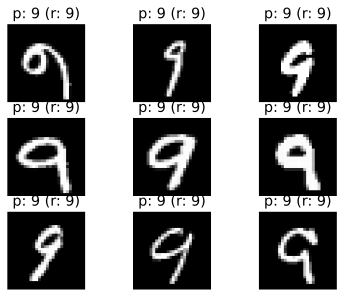

In [17]:
nines = y_test == '9'

x_nines = x_test[nines]
y_nines = y_test[nines]
y_nines_predicted = y_predicted[nines]
print(len(x_nines))
print(accuracy_score(y_nines_predicted, y_nines))

inds = np.random.randint(len(x_nines), size=9)
print(inds)
fig, axs = plt.subplots(3, 3)
for i in range(9):
    ii = inds[i]
    pic = np.resize(x_nines[ii], (width, width))
    this_axs = axs[i // 3, i % 3]
    this_axs.imshow(pic, cmap=cmap)
    this_axs.set_title(f"p: {y_nines_predicted[ii]} (r: {y_nines[ii]})")
    this_axs.axis('off')

plt.show()

('0', 0.0) ('1', 0.0) ('2', 0.0) ('3', 0.0) ('4', 0.0) ('5', 0.6666666666666666) ('6', 0.0) ('7', 0.0) ('8', 0.0) ('9', 0.3333333333333333)


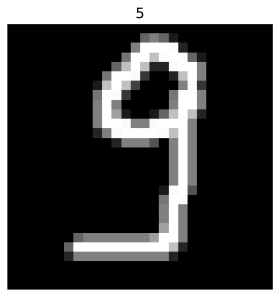

In [15]:
file_path = r"../pics/Pic9.bmp"
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
# image = Image.open(file_path)

image_f = np.array(image).flatten() / 255.

print(*zip(knc.classes_, knc.predict_proba([image_f])[0]))

image_pred = knc.predict([image_f])[0]

plt.figure(image_pred)
plt.imshow(image, cmap=cmap)
plt.title(image_pred)
plt.axis('off')

plt.show()

0 [('0', 0.67), ('7', 0.33), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('8', 0.0), ('9', 0.0)]
1 [('1', 1.0), ('0', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0)]
2 [('2', 1.0), ('0', 0.0), ('1', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0)]
3 [('3', 1.0), ('0', 0.0), ('1', 0.0), ('2', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0)]
4 [('1', 1.0), ('0', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0)]
5 [('4', 1.0), ('0', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('5', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0)]
6 [('3', 0.67), ('5', 0.33), ('0', 0.0), ('1', 0.0), ('2', 0.0), ('4', 0.0), ('6', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0)]
7 [('5', 0.67), ('6', 0.33), ('0', 0.0), ('1', 0.0), ('2', 0.0), ('3', 0.0), ('4', 0.0), ('7', 0.0), ('8', 0.0), ('9', 0.0)]
8 [('5', 0

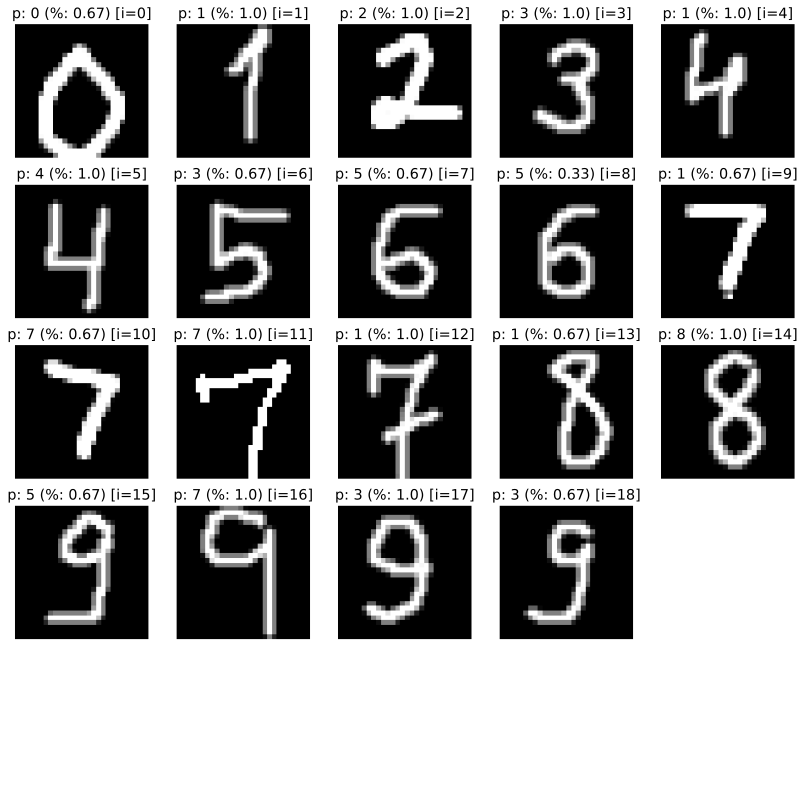

In [30]:
pics_path = os.scandir("../pics")


def prepare(pic_path):
    # image = Image.open(pic_path)
    image = cv2.imread(pic_path, cv2.IMREAD_GRAYSCALE)
    return np.array(image).flatten() / 255.


images = np.array(list(map(prepare, pics_path)))
image_preds = knc.predict(images)
image_pred_probs = np.round(knc.predict_proba(images), 2)

rows, cols = 5, 5

fig, axs = plt.subplots(rows, cols)
for i in range(min(rows * cols, len(image_preds))):
    pic = np.resize(images[i], (width, width))
    this_axs = axs[i // rows, i % cols]
    this_axs.imshow(pic, cmap=cmap)
    this_axs.set_title(f"p: {image_preds[i]} (%: {image_pred_probs[i].max()}) [{i=}]")
    print(i, list(sorted(zip(knc.classes_, image_pred_probs[i]), key=lambda x: -x[1])))

for i in range(rows * cols):
    axs[i // rows, i % cols].axis('off')

fig.set_size_inches(14, 14)
plt.autoscale()
plt.show()
